In [140]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [141]:
df=pd.read_csv("covid_usa.csv")

In [142]:
df.tail()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
53,Virginia,US,2020-05-21 02:32:54,37.7693,-78.1700,32908,1075,4523.0,27310.0,51,385.541875,212626.0,6059.0,3.266683,84000051,USA,2491.072892,18.411936
54,Washington,US,2020-05-21 02:32:54,47.4009,-121.4905,18971,1037,NaN,17934.0,53,249.130224,293120.0,NaN,5.466238,84000053,USA,3849.298999,NaN
55,West Virginia,US,2020-05-21 02:32:54,38.4912,-80.9545,1567,69,950.0,548.0,54,87.437024,80641.0,NaN,4.403318,84000054,USA,4499.686689,NaN
56,Wisconsin,US,2020-05-21 02:32:54,44.2685,-89.6165,13413,481,7728.0,5204.0,55,230.367575,167713.0,2161.0,3.586073,84000055,USA,2880.462020,16.111235
57,Wyoming,US,2020-05-21 02:32:54,42.7560,-107.3025,787,11,528.0,248.0,56,135.980607,18840.0,74.0,1.397713,84000056,USA,3255.240955,9.402795


Field description
1. Province_State - The name of the State within the USA.
2. Country_Region - The name of the Country (US).
3. Last_Update - The most recent date the file was pushed.
4. Lat - Latitude.
5. Long_ - Longitude.
6. Confirmed - Aggregated confirmed case count for the state.
7. Deaths - Aggregated Death case count for the state.
8. Recovered - Aggregated Recovered case count for the state.
9. Active - Aggregated confirmed cases that have not been resolved (Active = Confirmed - Recovered - Deaths).
10. FIPS - Federal Information Processing Standards code that uniquely identifies counties within the USA.
11. Incident_Rate - confirmed cases per 100,000 persons.
12. People_Tested - Total number of people who have been tested.
13. People_Hospitalized - Total number of people hospitalized.
14. Mortality_Rate - Number recorded deaths * 100/ Number confirmed cases.
15. UID - Unique Identifier for each row entry.
16. ISO3 - Officialy assigned country code identifiers.
17. Testing_Rate - Total number of people tested per 100,000 persons.
18. Hospitalization_Rate - Total number of people hospitalized * 100/ Number of confirmed cases.

In [143]:
df.shape

(58, 18)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

Treating missing values

In [145]:
df["Recovered"]=df["Confirmed"]-(df["Deaths"]+df["Active"])
#median for testing rate, people tested


In [146]:
cols=["People_Hospitalized","Lat","Long_","Incident_Rate","People_Tested","Mortality_Rate","Testing_Rate"]
for i in cols:
    df[i]=df[i].fillna(df[i].median())


In [147]:
df["Hospitalization_Rate"]=(df["People_Hospitalized"]*100)/df["Confirmed"]


In [148]:
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,0.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,1493.0,2.493766,84000002,USA,5063.940017,372.319202
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,0.0,0.0,60,0.000000,124.0,1493.0,4.403318,16,ASM,222.857246,inf
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [149]:

from numpy import inf
df.replace(to_replace =inf, 
                 value =0,inplace=True) 
#there was a infinte value replacing that with 0

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   58 non-null     float64
 4   Long_                 58 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             58 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         58 non-null     float64
 11  People_Tested         58 non-null     float64
 12  People_Hospitalized   58 non-null     float64
 13  Mortality_Rate        58 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [151]:
df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,5.800000e+01,58.000000,58.000000
mean,36.916702,-85.301014,26756.086207,1611.017241,5074.344828,20070.724138,3288.086207,391.204822,2.228466e+05,3430.017241,4.457301,7.676194e+07,3879.552237,276.139442
std,10.702145,48.876367,52562.031122,4084.750891,10393.125384,41294.705318,17408.350591,396.463546,2.939333e+05,10024.887841,2.116203,2.378302e+07,1900.557214,1053.932743
min,-14.271000,-170.132000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,0.000000
25%,34.872800,-99.697700,2596.000000,74.000000,0.000000,812.500000,18.250000,154.909239,4.745000e+04,1454.500000,3.116158,8.400001e+07,2741.843521,8.668012
50%,39.061850,-87.944200,10148.500000,385.000000,1079.500000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,3469.782532,13.511085
75%,42.214075,-77.072550,29395.500000,1394.250000,4383.750000,19291.250000,47.750000,462.828082,2.620348e+05,1722.750000,5.450908,8.400004e+07,4622.586404,18.970960
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,7109.523810


Observation:
1. The maximum number of cases confirmed in USA is 354370
2. Maximum number of deaths is 28,636 and recovered is 61,886

In [152]:
df_r=df.copy()

# Visualization
#DEATH


C:\Users\Preeti kumari\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


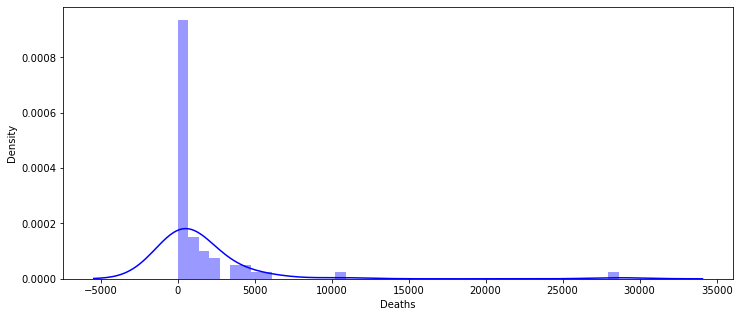

In [14]:
plt.figure(figsize=(12,5))
sns.distplot(df["Deaths"], color = 'b')

We can see that the maximum number of death is concentrated between the range 0-5000,lowest being 0 and heighest being around 28000

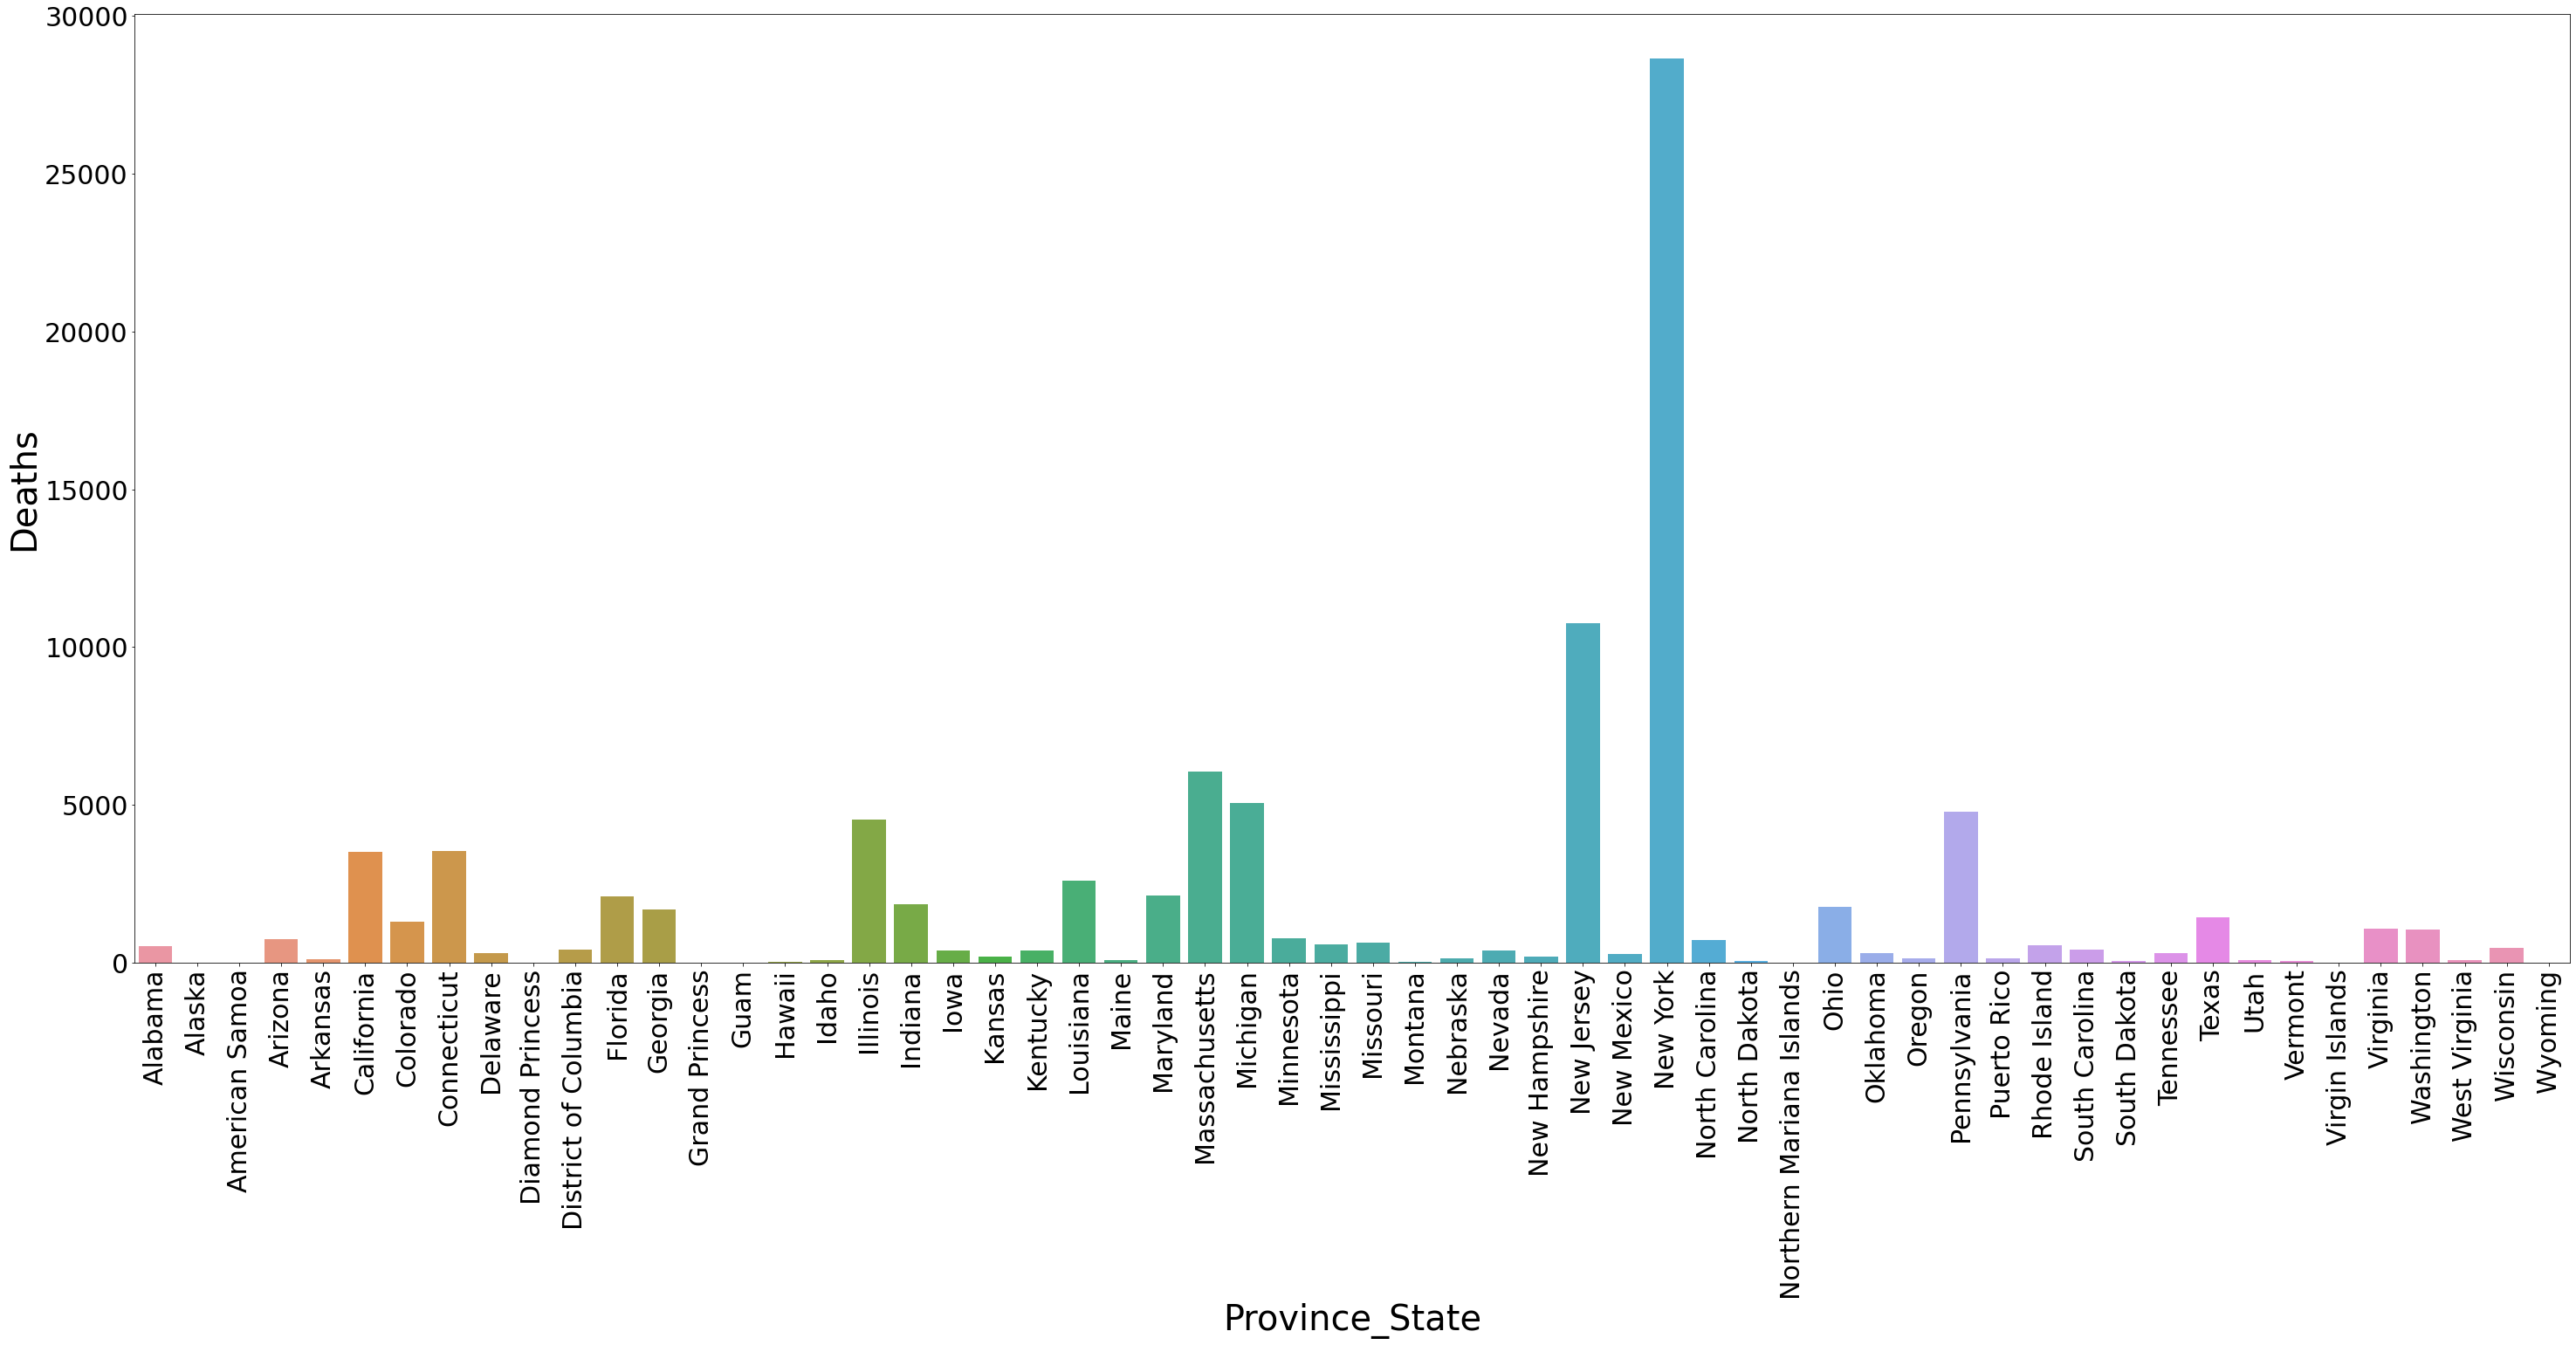

In [15]:
#plotting state and deaths 
plt.figure(figsize=(50,20))
plt.xlabel("Province_State", fontsize=40)
plt.ylabel("Deaths", fontsize=40)
plt.xticks(rotation=90,fontsize=30)
plt.yticks(rotation=0,fontsize=30)
sns.barplot(x="Province_State",y="Deaths",data=df)

Observation: 
 
 New York has maximum number of deaths followed by New Jersey 



Text(0, 0.5, 'Deaths')

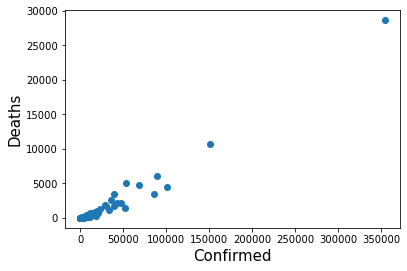

In [16]:
plt.scatter(x=df["Confirmed"],y=df["Deaths"])
plt.xlabel("Confirmed", fontsize=15)
plt.ylabel("Deaths", fontsize=15)

Observation:Positive relation between both

Text(0, 0.5, 'Deaths')

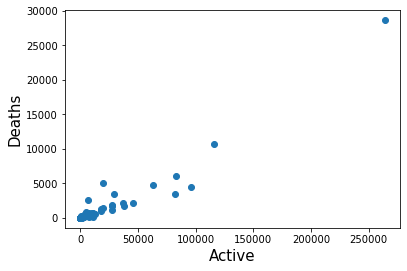

In [17]:
plt.scatter(x=df["Active"],y=df["Deaths"])
plt.xlabel("Active", fontsize=15)
plt.ylabel("Deaths", fontsize=15)

Observation:High Positive correlatin between Active and Deaths with few outliers

Text(0, 0.5, 'Deaths')

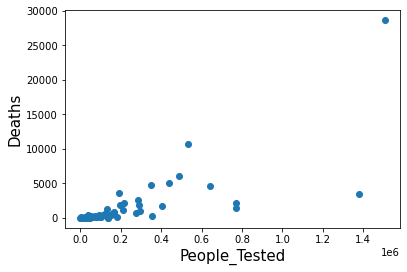

In [18]:
plt.scatter(x=df["People_Tested"],y=df["Deaths"])
plt.xlabel("People_Tested", fontsize=15)
plt.ylabel("Deaths", fontsize=15)

This also has positive relation with few outliers

Text(0, 0.5, 'Deaths')

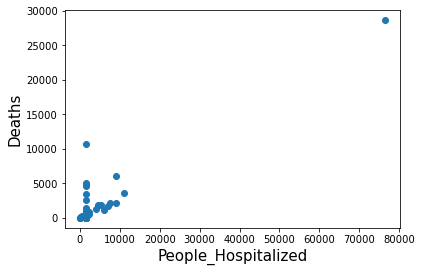

In [19]:
plt.scatter(x=df["People_Hospitalized"],y=df["Deaths"])
plt.xlabel("People_Hospitalized", fontsize=15)
plt.ylabel("Deaths", fontsize=15)

Text(0, 0.5, 'Deaths')

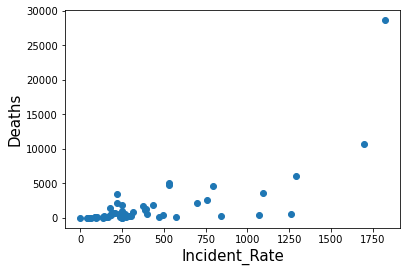

In [20]:
plt.scatter(x=df["Incident_Rate"],y=df["Deaths"])
plt.xlabel("Incident_Rate", fontsize=15)
plt.ylabel("Deaths", fontsize=15)

Observation: Positive correlation between the two

Text(0, 0.5, 'Deaths')

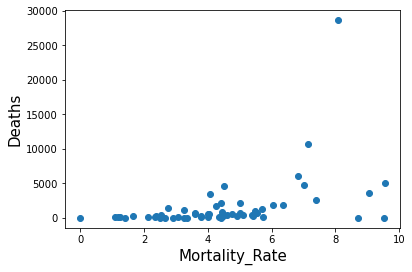

In [21]:
plt.scatter(x=df["Mortality_Rate"],y=df["Deaths"])
plt.xlabel("Mortality_Rate", fontsize=15)
plt.ylabel("Deaths", fontsize=15)

There is positive relationship between mortality rate and deaths

Text(0, 0.5, 'Deaths')

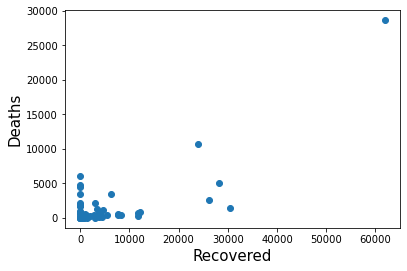

In [22]:
plt.scatter(x=df["Recovered"],y=df["Deaths"])
plt.xlabel("Recovered", fontsize=15)
plt.ylabel("Deaths", fontsize=15)

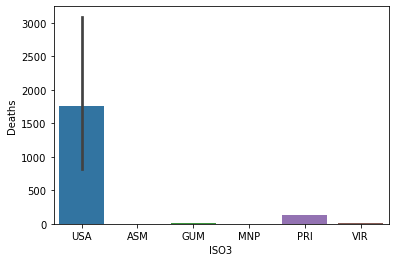

In [23]:
sns.barplot(x="ISO3",y="Deaths",data=df)

Observation:ISO3 refers to the country code identifier and mostly the regions is USA so this column is not that important

In [24]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df["Province_State"] = labelencoder.fit_transform(df["Province_State"])
#only encoding region as other object type almost have same values throught the column and will not be useful

In [25]:
corr_matrix=df.corr()
corr_matrix["Deaths"].sort_values(ascending=False)


Deaths                  1.000000
Confirmed               0.982191
Active                  0.954378
People_Hospitalized     0.899983
Recovered               0.782292
People_Tested           0.742632
Incident_Rate           0.713560
Mortality_Rate          0.427304
Testing_Rate            0.347261
UID                     0.120043
Lat                     0.116727
Long_                   0.029463
Province_State          0.015229
FIPS                   -0.075053
Hospitalization_Rate   -0.100068
Name: Deaths, dtype: float64

In [26]:
df.drop(columns=["FIPS","ISO3","Province_State","Lat","Long_","Hospitalization_Rate","Country_Region","Last_Update"],axis=1,inplace=True)
#dropping columns with poor correlation with death also some columns like Country_Region and last_update have same value

Text(0.5, 1.0, 'Coorelation with target variable')

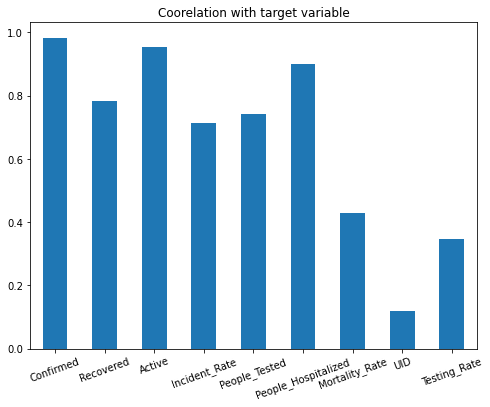

In [27]:
plt.figure(figsize=(8,6))
df.drop("Deaths",axis=1).corrwith(df["Deaths"]).plot(kind="bar")
plt.xticks(rotation=20)
plt.title("Coorelation with target variable")
#plotting the variables to find correlation

In [28]:
df.skew()
#highly skewed data

Confirmed              4.708614
Deaths                 5.489201
Recovered              3.649556
Active                 4.180953
Incident_Rate          2.012296
People_Tested          2.847892
People_Hospitalized    7.015366
Mortality_Rate         0.497497
UID                   -3.027480
Testing_Rate           1.333601
dtype: float64

In [29]:
import numpy as np
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [30]:
df.skew()

Confirmed             -1.374603
Deaths                -0.568714
Recovered             -0.591539
Active                -0.994488
Incident_Rate         -1.783566
People_Tested         -1.619104
People_Hospitalized   -0.074706
Mortality_Rate         0.497497
UID                   -3.027480
Testing_Rate          -2.953045
dtype: float64

In [31]:
from scipy import stats
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
threshold=3
new_df=df[(z < 3).all(axis=1)]
#removing outliers
print(df.shape,"  ",new_df.shape)
#one row dropped

(58, 10)    (52, 10)


In [32]:
x_d=new_df.drop("Deaths",axis=1)
y=new_df["Deaths"]
#splitting into input and output 

In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_d)
x=sc.transform(x_d)
x=pd.DataFrame(x,columns=x_d.columns)
#using standard scaler to bring all the values in a single scale

Model Evalution

In [34]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 45,test_size=0.20)

In [36]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso()]
for m in model:
    m.fit(x_train,y_train)
    print("score of ",m, "is:",m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("ERROR:")
    print(" Mean absolute error:", mean_absolute_error(y_test,predm))
    print("Mean squared error:",mean_squared_error(y_test,predm))
    print("r2 score :",r2_score(y_test,predm))
    print("\n")

score of  LinearRegression() is: 0.9957513590353813
ERROR:
 Mean absolute error: 0.10117966849872269
Mean squared error: 0.021571941618513325
r2 score : 0.9888326805318571


score of  DecisionTreeRegressor() is: 1.0
ERROR:
 Mean absolute error: 0.5452681085799059
Mean squared error: 0.4708546671574679
r2 score : 0.756248900344656


score of  KNeighborsRegressor() is: 0.9162875516156055
ERROR:
 Mean absolute error: 0.5352550819938732
Mean squared error: 0.39835624470434733
r2 score : 0.7937797382630915


score of  SVR() is: 0.8606732312128655
ERROR:
 Mean absolute error: 0.25860251715207155
Mean squared error: 0.1261722598019541
r2 score : 0.9346833976216258


score of  Lasso() is: 0.7480383490239382
ERROR:
 Mean absolute error: 0.6971033311372833
Mean squared error: 0.676042725429736
r2 score : 0.6500275579037968




# Evaluting KNN as it's accuracy is not too high and r2 score is maximum among all with less error


In [37]:
from sklearn.model_selection import GridSearchCV

model=SVR()
#Hyper Parameters Set
params = {'C': [6,7,8,9,10,11,12], 
          'kernel': ['linear','rbf']}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
#Learning
model1.fit(x,y)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction



Best Hyper Parameters:
 {'C': 6, 'kernel': 'linear'}


In [38]:
from sklearn.model_selection import cross_val_score

svr_p=SVR(C=6,kernel="linear")
svr_p.fit(x_train,y_train)
y_p=svr_p.predict(x_test)
print("score of ",svr_p, "is:",svr_p.score(x_train,y_train))
print("ERROR:")
print(" Mean absolute error:", mean_absolute_error(y_test,y_p))
print("Mean squared error:",mean_squared_error(y_test,y_p))
print("r2 score :",r2_score(y_test,y_p))
print("Cross val score :",cross_val_score(svr_p,x,y,cv=5,scoring="r2").mean())
print("\n")

score of  SVR(C=6, kernel='linear') is: 0.9953977887054183
ERROR:
 Mean absolute error: 0.09959381943023833
Mean squared error: 0.021080008972123844
r2 score : 0.9890873432375232
Cross val score : 0.984436946382304




In [39]:
df_deaths=pd.DataFrame(y_p)

In [40]:
df_deaths.to_csv('Output_Deaths.csv') 


In [42]:
import joblib
joblib.dump(svr_p,"deaths.pkl")

['deaths.pkl']

C:\Users\Preeti kumari\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


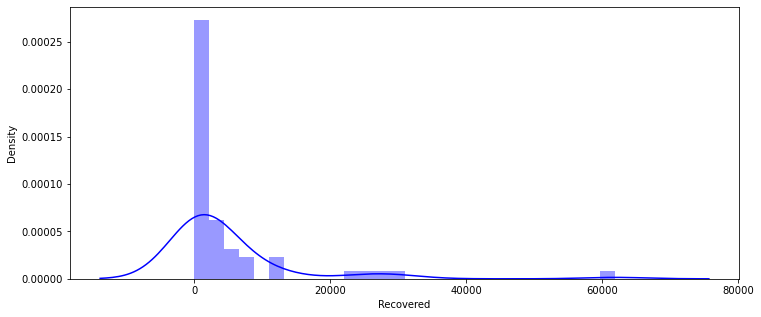

In [113]:
plt.figure(figsize=(12,5))
sns.distplot(df_r["Recovered"], color = 'b')

Observation:Mostly saturated between 0-10

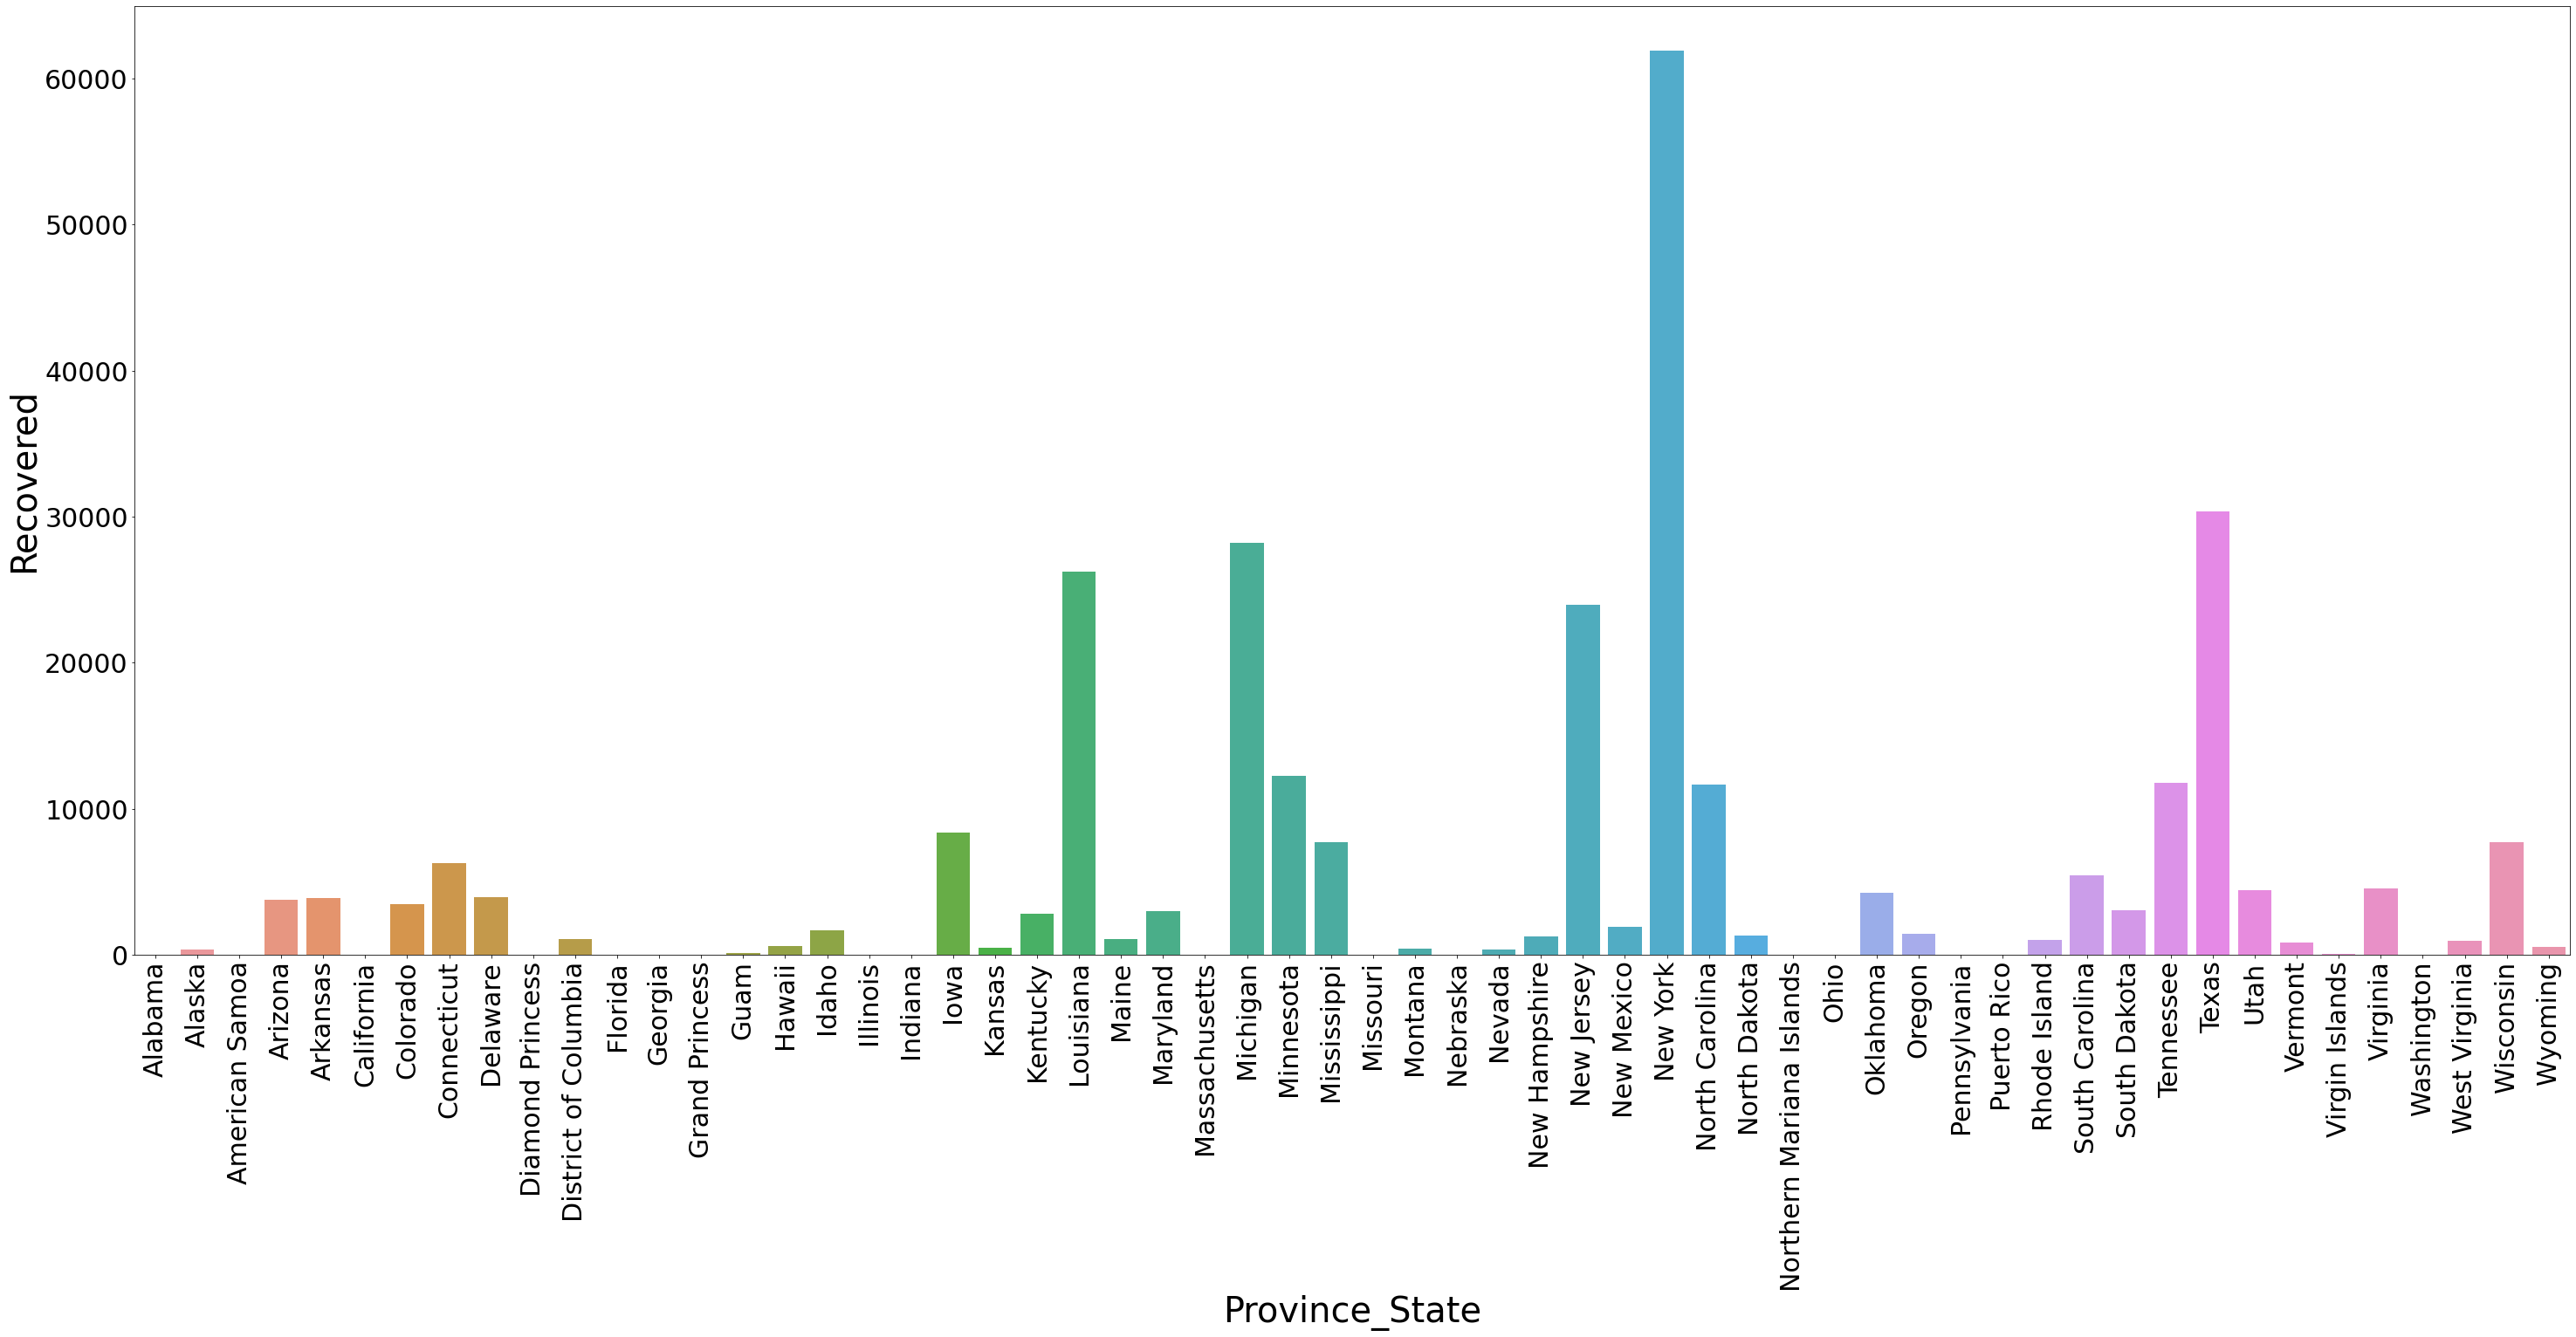

In [114]:
#plotting state and Recovered 
plt.figure(figsize=(50,20))
plt.xlabel("Province_State", fontsize=40)
plt.ylabel("Recovered", fontsize=40)
plt.xticks(rotation=90,fontsize=30)
plt.yticks(rotation=0,fontsize=30)
sns.barplot(x="Province_State",y="Recovered",data=df_r)

Observation:Maximum recovered cases in New York followed by Texas ,Michigan

Text(0, 0.5, 'Recovered')

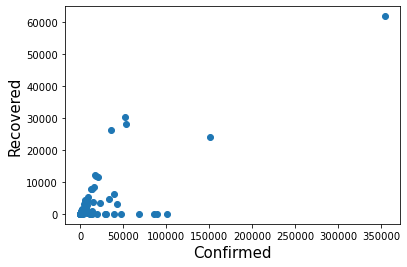

In [115]:
plt.scatter(x=df_r["Confirmed"],y=df_r["Recovered"])
plt.xlabel("Confirmed", fontsize=15)
plt.ylabel("Recovered", fontsize=15)

Observation:Positive correlation between the two

In [116]:
df_r.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

Text(0, 0.5, 'Recovered')

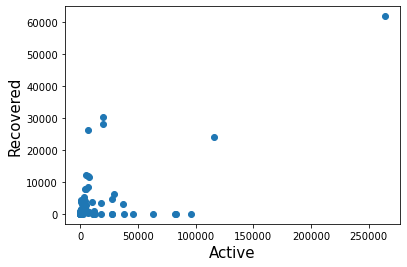

In [117]:
plt.scatter(x=df_r["Active"],y=df_r["Recovered"])
plt.xlabel("Active", fontsize=15)
plt.ylabel("Recovered", fontsize=15)

Observation:Positive correlation between the two

Text(0, 0.5, 'Recovered')

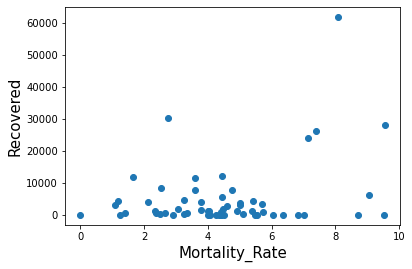

In [118]:
plt.scatter(x=df_r["Mortality_Rate"],y=df_r["Recovered"])
plt.xlabel("Mortality_Rate", fontsize=15)
plt.ylabel("Recovered", fontsize=15)

Observation:Not a strong correlation between the two

Text(0, 0.5, 'Recovered')

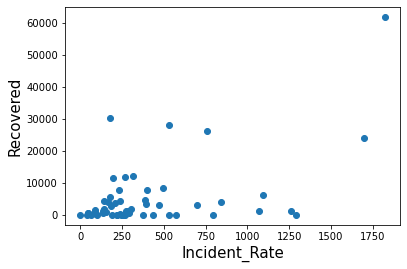

In [119]:
plt.scatter(x=df_r["Incident_Rate"],y=df_r["Recovered"])
plt.xlabel("Incident_Rate", fontsize=15)
plt.ylabel("Recovered", fontsize=15)

Observation: strong correlation between the two

Text(0, 0.5, 'Recovered')

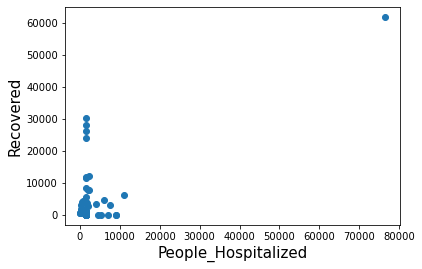

In [120]:
plt.scatter(x=df_r["People_Hospitalized"],y=df_r["Recovered"])
plt.xlabel("People_Hospitalized", fontsize=15)
plt.ylabel("Recovered", fontsize=15)

Observation:Positive correlation between the two

In [153]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df_r["Province_State"] = labelencoder.fit_transform(df_r["Province_State"])
#only encoding region as other object type almost have same values throught the column and will not be useful

In [154]:
corr_matrix=df_r.corr()
corr_matrix["Recovered"].sort_values(ascending=False)


Recovered               1.000000
Deaths                  0.782292
Confirmed               0.756823
People_Hospitalized     0.701931
Active                  0.634259
People_Tested           0.598979
Incident_Rate           0.523887
Mortality_Rate          0.306310
Testing_Rate            0.272625
UID                     0.150011
Province_State          0.136544
Lat                     0.082862
Long_                  -0.006098
FIPS                   -0.092894
Hospitalization_Rate   -0.123776
Name: Recovered, dtype: float64

In [155]:
df_r.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [156]:
df_r.drop(columns=["FIPS",'Lat',"Long_","Country_Region","Last_Update","ISO3","UID","Hospitalization_Rate"],axis=1,inplace=True)

In [157]:
df_r.skew()

Province_State         0.000000
Confirmed              4.708614
Deaths                 5.489201
Recovered              3.649556
Active                 4.180953
Incident_Rate          2.012296
People_Tested          2.847892
People_Hospitalized    7.015366
Mortality_Rate         0.497497
Testing_Rate           1.333601
dtype: float64

In [158]:
from sklearn.preprocessing import power_transform
new_df=power_transform(df_r,method="yeo-johnson")
new_df=pd.DataFrame(new_df,columns=df_r.columns)

In [159]:
new_df.skew()

Province_State        -0.269845
Confirmed             -0.033709
Deaths                -0.029293
Recovered             -0.210204
Active                -0.089886
Incident_Rate          0.096304
People_Tested          0.027503
People_Hospitalized    0.009592
Mortality_Rate         0.009836
Testing_Rate           0.227785
dtype: float64

In [160]:
from scipy import stats
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_r))
threshold=3
new_df_=df_r[(z < 3).all(axis=1)]
#removinG outliers
print(new_df_.shape,"  ",df_r.shape)
#rows dropped which has outliers

(54, 10)    (58, 10)


In [161]:
X_p=new_df_.drop("Recovered",axis=1)
Y=new_df_["Recovered"]

In [162]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_p)
X=sc.transform(X_p)
X=pd.DataFrame(X,columns=X_p.columns)
#scaling the columns of x_ap

In [163]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state = 40,test_size=0.20)


In [164]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [165]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    m.fit(X_train,Y_train)
    print("score of ",m, "is:",m.score(X_train,Y_train))
    predm=m.predict(X_test)
    print("ERROR:")
    print(" Mean absolute error:", mean_absolute_error(Y_test,predm))
    print("Mean squared error:",mean_squared_error(Y_test,predm))
    print("r2 score :",r2_score(Y_test,predm))
    print("\n")

score of  LinearRegression() is: 1.0
ERROR:
 Mean absolute error: 1.1864771791310472e-11
Mean squared error: 3.146858243982984e-22
r2 score : 1.0


score of  DecisionTreeRegressor() is: 1.0
ERROR:
 Mean absolute error: 7484.545454545455
Mean squared error: 134192602.72727273
r2 score : -1.3682731830205057


score of  KNeighborsRegressor() is: 0.30421533599519934
ERROR:
 Mean absolute error: 5200.854545454546
Mean squared error: 50583306.50545454
r2 score : 0.1072899260412955


score of  SVR() is: -0.14485210805375814
ERROR:
 Mean absolute error: 5667.491435684893
Mean squared error: 84900492.4001543
r2 score : -0.4983505445912151


score of  Lasso() is: 0.9999962579790396
ERROR:
 Mean absolute error: 14.877088852594541
Mean squared error: 371.9478829302156
r2 score : 0.9999934357469881


score of  Ridge() is: 0.8983250726654245
ERROR:
 Mean absolute error: 2017.9637278381167
Mean squared error: 7958704.334026381
r2 score : 0.8595422872587812


score of  ElasticNet() is: 0.4542882515884

# Using Ridge as it has better accuracy and r2 score

In [170]:
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[0.001,0.01,0.1],'random_state':range(42,100)}
reg=GridSearchCV(ridge,parameters)
reg.fit(X,Y)
reg.best_params_

{'alpha': 0.001, 'random_state': 42}

In [171]:
model=Ridge(alpha=0.001,random_state=42)
model.fit(X_train,Y_train)
pred=model.predict(X_test)
print("score of ",model, "is:",model.score(X_train,Y_train))
print(" Mean absolute error:", mean_absolute_error(Y_test,pred))
print("Mean squared error:",mean_squared_error(Y_test,pred))
print("r2 score :",r2_score(Y_test,pred))
print("\n")

score of  Ridge(alpha=0.001, random_state=42) is: 0.9999991148962897
 Mean absolute error: 6.8217037719256375
Mean squared error: 74.36904818948443
r2 score : 0.9999986875116892




Text(0, 0.5, 'Predicted y')

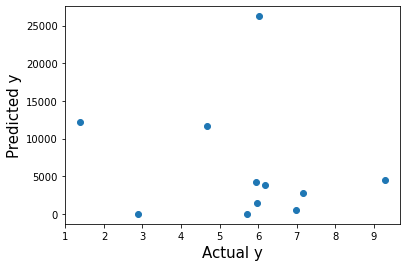

In [174]:
plt.scatter(y_test,pred)
plt.xlabel("Actual y", fontsize=15)
plt.ylabel("Predicted y", fontsize=15)

In [176]:
df_recovered=pd.DataFrame(pred)
df_recovered.to_csv('Recovered.csv') 


In [177]:
import joblib
joblib.dump(model,"Recovered.pkl")

['Recovered.pkl']